# Flight Delay Prediction - EDA

In [129]:
import pandas as pd

df = pd.read_csv('flight_data.csv')

df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,0.0,0.0,0.0,0.0,0.0
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,0.0,0.0,0.0,0.0,0.0
3,3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928363,1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1928364,1936754,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1928365,1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1928366,1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,0.0,0.0,0.0,0.0,0.0


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928368 entries, 0 to 1928367
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [131]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,0.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,0.0,0.0,0.0,0.0,0.0
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928363,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1928364,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1928365,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1928366,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,N,0,0.0,0.0,0.0,0.0,0.0


In [132]:
df.drop(['CancellationCode'], axis=1, inplace=True)
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,810,4.0,8.0,0,0,0.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,810,5.0,10.0,0,0,0.0,0.0,0.0,0.0,0.0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,515,3.0,17.0,0,0,0.0,0.0,0.0,0.0,0.0
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,515,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,688,4.0,10.0,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928363,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,906,9.0,18.0,0,0,3.0,0.0,0.0,0.0,22.0
1928364,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,481,15.0,34.0,0,0,0.0,57.0,18.0,0.0,0.0
1928365,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,689,8.0,32.0,0,0,1.0,0.0,19.0,0.0,79.0
1928366,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,533,13.0,13.0,0,0,0.0,0.0,0.0,0.0,0.0


In [133]:
df['TotalDelay'] = df['ArrDelay'] + df['DepDelay']
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,0,0.0,0.0,0.0,0.0,0.0,-6.0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,0,0.0,0.0,0.0,0.0,0.0,21.0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,0,0.0,0.0,0.0,0.0,0.0,22.0
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0,68.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,0,0.0,0.0,0.0,0.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928363,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,0,3.0,0.0,0.0,0.0,22.0,55.0
1928364,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,0,0.0,57.0,18.0,0.0,0.0,132.0
1928365,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,0,1.0,0.0,19.0,0.0,79.0,179.0
1928366,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,0,0.0,0.0,0.0,0.0,0.0,20.0


In [134]:
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")
print_unique_values(df)

Unique values in column 'Year': [2008]
Unique values in column 'Month': [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values in column 'DayofMonth': [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31  2  1]
Unique values in column 'DayOfWeek': [4 5 6 7 1 2 3]
Unique values in column 'DepTime': [2003.  754.  628. ...  459.  454.  425.]
Unique values in column 'CRSDepTime': [1955  735  620 ... 2331   48  140]
Unique values in column 'ArrTime': [2211. 1002.  804. ...  401.  437.  405.]
Unique values in column 'CRSArrTime': [2225 1000  750 ...  305  334  147]
Unique values in column 'UniqueCarrier': ['WN' 'XE' 'YV' 'OH' 'OO' 'UA' 'US' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'NW'
 '9E' 'AA' 'AQ' 'AS' 'B6' 'CO']
Unique values in column 'FlightNum': [ 335 3231  448 ... 6870 5272 9741]
Unique values in column 'TailNum': ['N712SW' 'N772SW' 'N428WN' ... 'N75428' 'N75429' 'N78008']
Unique values in column 'ActualElapsedTime': [ 128.   96.   90.  101.  240.  130.  121.  

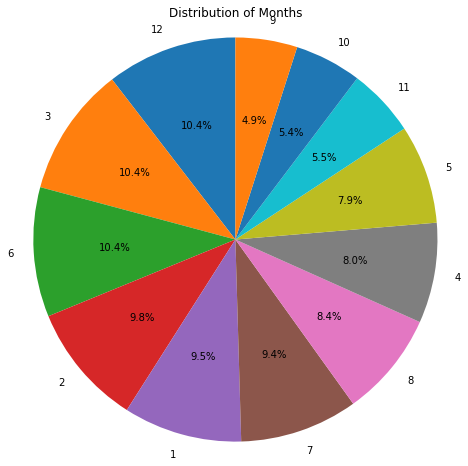

Month
12    201508
3     200115
6     199888
2     188625
1     182915
7     182171
8     161974
4     154783
5     152709
11    105148
10    103181
9      95351
Name: count, dtype: int64


In [135]:
import matplotlib.pyplot as plt

month_counts = df['Month'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Months')
plt.axis('equal')  

plt.show()
print(month_counts)

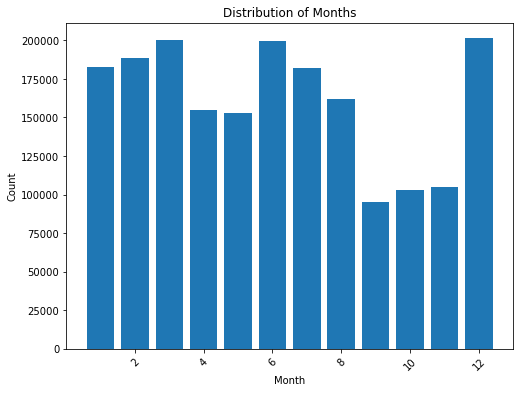

In [136]:
plt.figure(figsize=(8, 6))
plt.bar(month_counts.index, month_counts.values)
plt.title('Distribution of Months')
plt.xlabel('Month')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

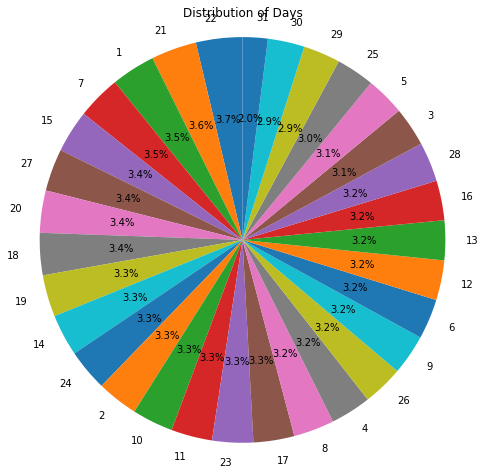

DayofMonth
22    71331
21    69897
1     67618
7     67203
15    65311
27    65056
20    64829
18    64775
19    64232
14    64129
24    64025
2     63152
10    63082
11    63080
23    62980
17    62816
8     62591
4     62252
26    62198
9     61826
6     61514
12    61316
13    61035
16    60870
28    60863
3     60219
5     59753
25    58757
29    56687
30    56433
31    38538
Name: count, dtype: int64


In [137]:
day_counts = df['DayofMonth'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Days')
plt.axis('equal')  

plt.show()
print(day_counts)

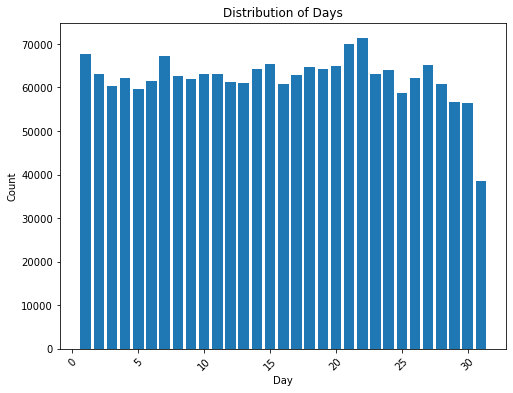

In [138]:
plt.figure(figsize=(8, 6))
plt.bar(day_counts.index, day_counts.values)
plt.title('Distribution of Days')
plt.xlabel('Day')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

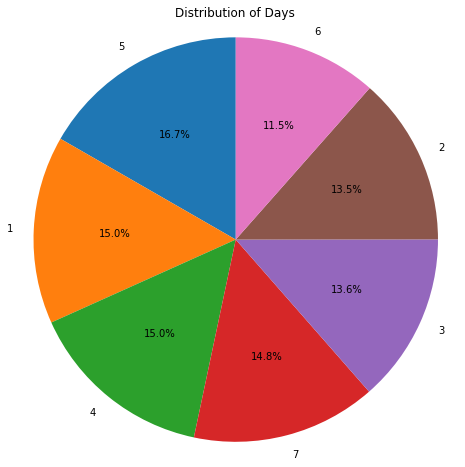

DayOfWeek
5    321982
1    289822
4    288343
7    284940
3    261498
2    259583
6    222200
Name: count, dtype: int64


In [139]:
day_week_counts = df['DayOfWeek'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(day_week_counts, labels=day_week_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Days')
plt.axis('equal')  

plt.show()
print(day_week_counts)

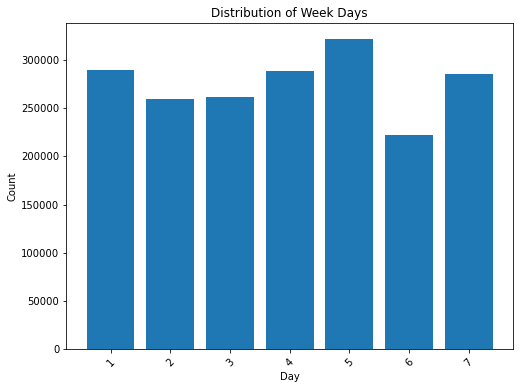

In [140]:
plt.figure(figsize=(8, 6))
plt.bar(day_week_counts.index, day_week_counts.values)
plt.title('Distribution of Week Days')
plt.xlabel('Day')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

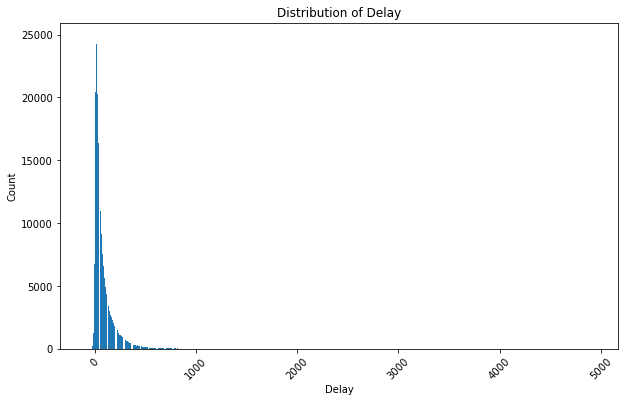

TotalDelay
17.0      24730
16.0      24521
15.0      24430
18.0      24305
19.0      24231
          ...  
1291.0        1
1443.0        1
1885.0        1
1913.0        1
1243.0        1
Name: count, Length: 1891, dtype: int64


In [141]:
delay_counts = df['TotalDelay'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(delay_counts.index, delay_counts.values)
plt.title('Distribution of Delay')
plt.xlabel('Delay')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()
print(delay_counts)

<AxesSubplot:>

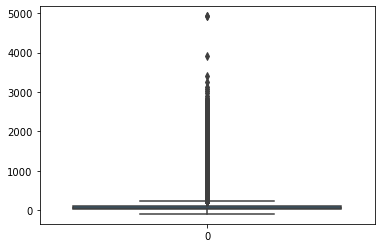

In [142]:
import seaborn as sns
sns.boxplot(df['TotalDelay'])

In [143]:
df['TotalDelay'].describe().loc[['min', '25%', '50%', '75%', 'max']]

min     -90.0
25%      22.0
50%      49.0
75%     108.0
max    4920.0
Name: TotalDelay, dtype: float64

In [144]:
print(df['TotalDelay'].mean())

85.29136917849705


In [145]:
Q1 = df['TotalDelay'].quantile(0.25)
Q3 = df['TotalDelay'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
outliers = df[(df['TotalDelay'] < Q1 - threshold * IQR) | (df['TotalDelay'] > Q3 + threshold)]
outlier_count = outliers['TotalDelay'].count()
print(outlier_count)

473846


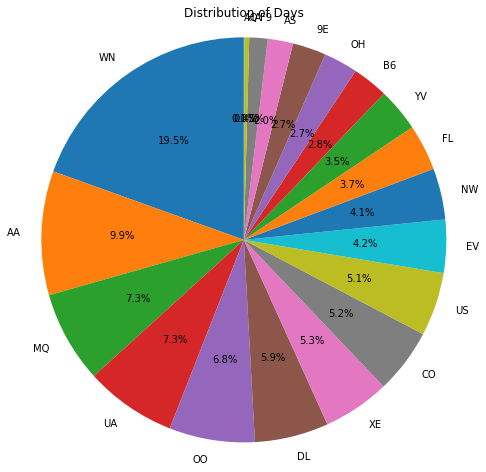

UniqueCarrier
WN    376201
AA    190910
MQ    141223
UA    140904
OO    131780
DL    113728
XE    103147
CO     99731
US     98007
EV     81762
NW     78843
FL     70969
YV     66769
B6     54925
OH     52451
9E     51568
AS     39010
F9     28224
HA      7472
AQ       744
Name: count, dtype: int64


In [146]:
carrier_count = df['UniqueCarrier'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(carrier_count, labels=carrier_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Days')
plt.axis('equal')  

plt.show()
print(carrier_count)


In [147]:
origin_count = df['Origin'].value_counts()
print(origin_count.head(20))

Origin
ATL    131213
ORD    125451
DFW     95058
DEN     74033
LAX     58545
IAH     56571
PHX     55506
LAS     53536
EWR     52756
DTW     43721
SFO     43635
MCO     35959
CLT     34942
JFK     34477
MSP     32293
LGA     31062
SEA     30928
BWI     30604
PHL     30188
MDW     29121
Name: count, dtype: int64


In [148]:
dest_origin = df['Dest'].value_counts()
print(dest_origin.head(20))

Dest
ORD    108265
ATL    106540
DFW     70181
DEN     62850
LAX     59843
EWR     55492
LAS     48610
PHX     47693
SFO     46752
IAH     43629
LGA     37740
MCO     36326
JFK     35233
DTW     34696
BOS     31878
SEA     31441
PHL     30615
BWI     29549
SLC     29133
MSP     28005
Name: count, dtype: int64


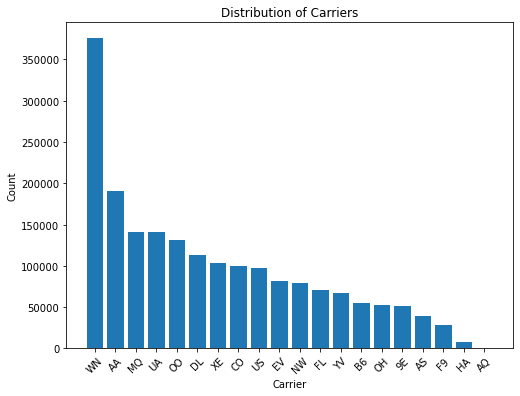

In [149]:
plt.figure(figsize=(8, 6))
plt.bar(carrier_count.index, carrier_count.values)
plt.title('Distribution of Carriers')
plt.xlabel('Carrier')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

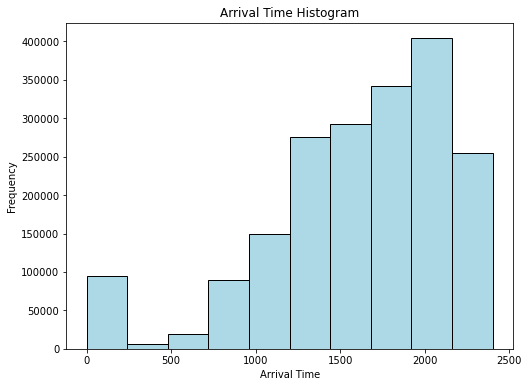

In [150]:
plt.figure(figsize=(8, 6))
plt.hist(df['ArrTime'], bins=10, color='lightblue', edgecolor='black')
plt.title('Arrival Time Histogram')
plt.xlabel('Arrival Time')
plt.ylabel('Frequency')


plt.show()

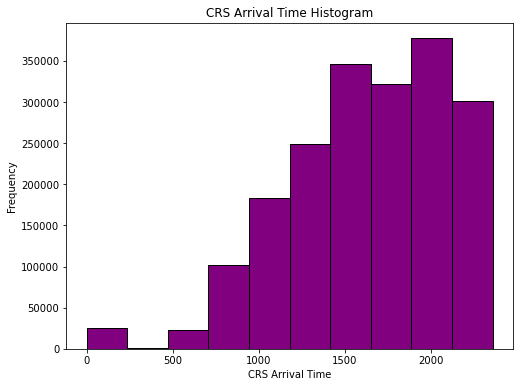

In [151]:
plt.figure(figsize=(8, 6))
plt.hist(df['CRSArrTime'], bins=10, color='purple', edgecolor='black')
plt.title('CRS Arrival Time Histogram')
plt.xlabel('CRS Arrival Time')
plt.ylabel('Frequency')

plt.show()

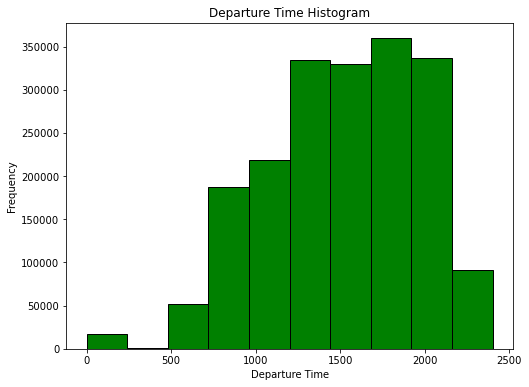

In [152]:
plt.figure(figsize=(8, 6))
plt.hist(df['DepTime'], bins=10, color='green', edgecolor='black')
plt.title('Departure Time Histogram')
plt.xlabel('Departure Time')
plt.ylabel('Frequency')


plt.show()

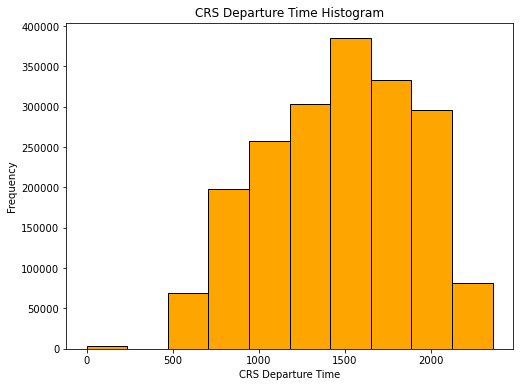

In [153]:
plt.figure(figsize=(8, 6))
plt.hist(df['CRSDepTime'], bins=10, color='orange', edgecolor='black')
plt.title('CRS Departure Time Histogram')
plt.xlabel('CRS Departure Time')
plt.ylabel('Frequency')


plt.show()

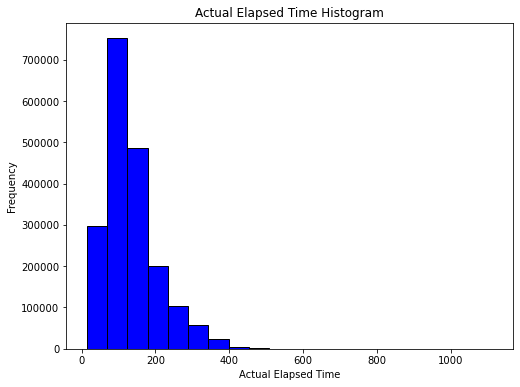

In [154]:
plt.figure(figsize=(8, 6))
plt.hist(df['ActualElapsedTime'], bins=20, color='blue', edgecolor='black')
plt.title('Actual Elapsed Time Histogram')
plt.xlabel('Actual Elapsed Time')
plt.ylabel('Frequency')

plt.show()

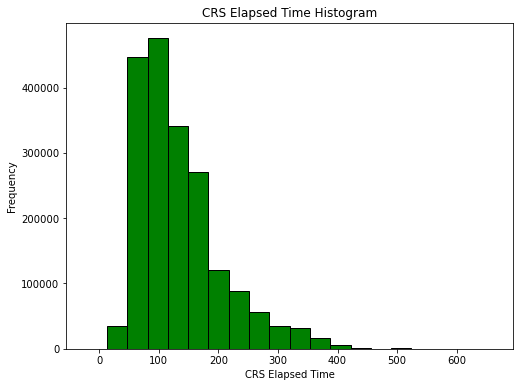

In [155]:
plt.figure(figsize=(8, 6))
plt.hist(df['CRSElapsedTime'], bins=20, color='green', edgecolor='black')
plt.title('CRS Elapsed Time Histogram')
plt.xlabel('CRS Elapsed Time')
plt.ylabel('Frequency')


plt.show()

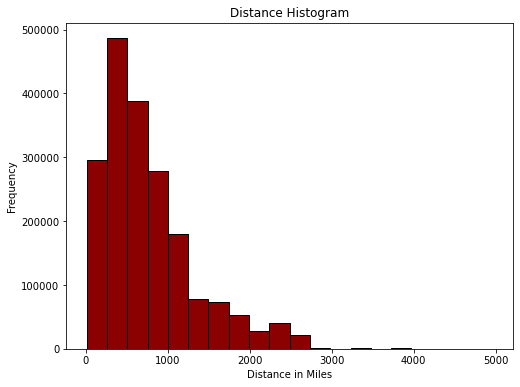

In [156]:
plt.figure(figsize=(8, 6))
plt.hist(df['Distance'], bins=20, color='darkred', edgecolor='black')
plt.title('Distance Histogram')
plt.xlabel('Distance in Miles')
plt.ylabel('Frequency')

plt.show()

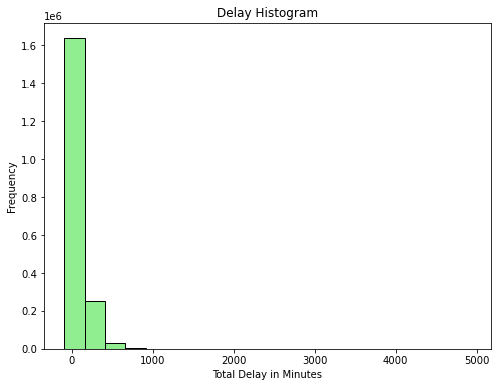

In [157]:
plt.figure(figsize=(8, 6))
plt.hist(df['TotalDelay'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Delay Histogram')
plt.xlabel('Total Delay in Minutes')
plt.ylabel('Frequency')

plt.show()

In [158]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,0,0.0,0.0,0.0,0.0,0.0,-6.0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,0,0.0,0.0,0.0,0.0,0.0,21.0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,0,0.0,0.0,0.0,0.0,0.0,22.0
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0,68.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,0,0.0,0.0,0.0,0.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928363,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,0,3.0,0.0,0.0,0.0,22.0,55.0
1928364,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,0,0.0,57.0,18.0,0.0,0.0,132.0
1928365,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,0,1.0,0.0,19.0,0.0,79.0,179.0
1928366,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,0,0.0,0.0,0.0,0.0,0.0,20.0


In [159]:
# find non-numeric columns to create dummy variables
df._get_numeric_data()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,335,128.0,...,4.0,8.0,0,0,0.0,0.0,0.0,0.0,0.0,-6.0
1,2008,1,3,4,754.0,735,1002.0,1000,3231,128.0,...,5.0,10.0,0,0,0.0,0.0,0.0,0.0,0.0,21.0
2,2008,1,3,4,628.0,620,804.0,750,448,96.0,...,3.0,17.0,0,0,0.0,0.0,0.0,0.0,0.0,22.0
3,2008,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,...,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0,68.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,378,101.0,...,4.0,10.0,0,0,0.0,0.0,0.0,0.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928363,2008,12,13,6,1250.0,1220,1617.0,1552,1621,147.0,...,9.0,18.0,0,0,3.0,0.0,0.0,0.0,22.0,55.0
1928364,2008,12,13,6,657.0,600,904.0,749,1631,127.0,...,15.0,34.0,0,0,0.0,57.0,18.0,0.0,0.0,132.0
1928365,2008,12,13,6,1007.0,847,1149.0,1010,1631,162.0,...,8.0,32.0,0,0,1.0,0.0,19.0,0.0,79.0,179.0
1928366,2008,12,13,6,1251.0,1240,1446.0,1437,1639,115.0,...,13.0,13.0,0,0,0.0,0.0,0.0,0.0,0.0,20.0


In [160]:
df.select_dtypes(include = ['object'])

,UniqueCarrier,TailNum,Origin,Dest
0,WN,N712SW,IAD,TPA
1,WN,N772SW,IAD,TPA
2,WN,N428WN,IND,BWI
3,WN,N464WN,IND,BWI
4,WN,N726SW,IND,JAX
...,...,...,...,...
1928363,DL,N938DL,MSP,ATL
1928364,DL,N3743H,RIC,ATL
1928365,DL,N909DA,ATL,IAH
1928366,DL,N646DL,IAD,ATL


In [161]:
# dropping tail number for ease of use purposes
df.drop(['TailNum'], axis=1, inplace=True)
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,0,0.0,0.0,0.0,0.0,0.0,-6.0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,0,0.0,0.0,0.0,0.0,0.0,21.0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,0,0.0,0.0,0.0,0.0,0.0,22.0
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0,68.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,0,0.0,0.0,0.0,0.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928363,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,0,3.0,0.0,0.0,0.0,22.0,55.0
1928364,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,0,0.0,57.0,18.0,0.0,0.0,132.0
1928365,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,0,1.0,0.0,19.0,0.0,79.0,179.0
1928366,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,0,0.0,0.0,0.0,0.0,0.0,20.0


In [162]:
# using only top 10 origins and destinations

top_origins = ['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'IAH', 'PHX', 'LAS', 'EWR', 'DTW']

df = df[df['Origin'].isin(top_origins)]
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay
49,2008,1,3,4,1538.0,1445,1753.0,1710,WN,500,...,4.0,11.0,0,0,15.0,0.0,0.0,0.0,28.0,96.0
50,2008,1,3,4,2248.0,2125,102.0,2345,WN,890,...,4.0,10.0,0,0,7.0,0.0,0.0,0.0,70.0,160.0
51,2008,1,3,4,1327.0,1230,1550.0,1500,WN,1171,...,3.0,15.0,0,0,50.0,0.0,0.0,0.0,0.0,107.0
52,2008,1,3,4,1614.0,1600,1833.0,1825,WN,1925,...,4.0,15.0,0,0,0.0,0.0,0.0,0.0,0.0,22.0
53,2008,1,3,4,1832.0,1655,148.0,30,WN,302,...,3.0,10.0,0,0,8.0,0.0,0.0,0.0,70.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928351,2008,12,13,6,955.0,934,1215.0,1155,DL,1542,...,6.0,20.0,0,0,20.0,0.0,0.0,0.0,0.0,41.0
1928353,2008,12,13,6,1053.0,1000,1218.0,1141,DL,1550,...,5.0,14.0,0,0,37.0,0.0,0.0,0.0,0.0,90.0
1928355,2008,12,13,6,1025.0,950,1218.0,1130,DL,1554,...,4.0,41.0,0,0,35.0,0.0,13.0,0.0,0.0,83.0
1928361,2008,12,13,6,921.0,830,1112.0,1008,DL,1616,...,8.0,21.0,0,0,51.0,0.0,13.0,0.0,0.0,115.0


In [163]:
top_dest = ['ORD', 'ATL', 'DFW', 'DEN', 'LAX', 'EWR', 'LAS', 'PHX', 'SFO', 'IAH']

df = df[df['Dest'].isin(top_dest)]
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay
78,2008,1,3,4,1047.0,1030,1328.0,1320,WN,157,...,9.0,13.0,0,0,0.0,0.0,0.0,0.0,0.0,25.0
79,2008,1,3,4,2232.0,2115,108.0,5,WN,632,...,6.0,13.0,0,0,0.0,0.0,7.0,0.0,56.0,140.0
80,2008,1,3,4,1512.0,1315,1802.0,1610,WN,706,...,8.0,14.0,0,0,0.0,0.0,0.0,0.0,112.0,229.0
81,2008,1,3,4,2025.0,1955,2301.0,2245,WN,908,...,6.0,12.0,0,0,7.0,0.0,0.0,0.0,9.0,46.0
82,2008,1,3,4,1439.0,1425,1720.0,1720,WN,1582,...,7.0,9.0,0,0,0.0,0.0,0.0,0.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928281,2008,12,13,6,1455.0,1400,2013.0,1935,DL,1032,...,17.0,15.0,0,0,0.0,0.0,0.0,0.0,38.0,93.0
1928282,2008,12,13,6,1357.0,1350,1638.0,1612,DL,1049,...,5.0,20.0,0,0,7.0,0.0,19.0,0.0,0.0,33.0
1928287,2008,12,13,6,955.0,948,1655.0,1635,DL,1080,...,12.0,42.0,0,0,0.0,0.0,13.0,0.0,7.0,27.0
1928289,2008,12,13,6,1354.0,1330,2104.0,2018,DL,1088,...,18.0,49.0,0,0,0.0,0.0,22.0,0.0,24.0,70.0


In [164]:
# using only top 10 carriers
top_carriers = ['WN', 'AA', 'MQ', 'UA', 'OO', 'DL', 'XE', 'CO', 'US', 'EV']

df = df[df['UniqueCarrier'].isin(top_carriers)]
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay
78,2008,1,3,4,1047.0,1030,1328.0,1320,WN,157,...,9.0,13.0,0,0,0.0,0.0,0.0,0.0,0.0,25.0
79,2008,1,3,4,2232.0,2115,108.0,5,WN,632,...,6.0,13.0,0,0,0.0,0.0,7.0,0.0,56.0,140.0
80,2008,1,3,4,1512.0,1315,1802.0,1610,WN,706,...,8.0,14.0,0,0,0.0,0.0,0.0,0.0,112.0,229.0
81,2008,1,3,4,2025.0,1955,2301.0,2245,WN,908,...,6.0,12.0,0,0,7.0,0.0,0.0,0.0,9.0,46.0
82,2008,1,3,4,1439.0,1425,1720.0,1720,WN,1582,...,7.0,9.0,0,0,0.0,0.0,0.0,0.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928281,2008,12,13,6,1455.0,1400,2013.0,1935,DL,1032,...,17.0,15.0,0,0,0.0,0.0,0.0,0.0,38.0,93.0
1928282,2008,12,13,6,1357.0,1350,1638.0,1612,DL,1049,...,5.0,20.0,0,0,7.0,0.0,19.0,0.0,0.0,33.0
1928287,2008,12,13,6,955.0,948,1655.0,1635,DL,1080,...,12.0,42.0,0,0,0.0,0.0,13.0,0.0,7.0,27.0
1928289,2008,12,13,6,1354.0,1330,2104.0,2018,DL,1088,...,18.0,49.0,0,0,0.0,0.0,22.0,0.0,24.0,70.0


In [165]:
df.select_dtypes(include = ['object'])

,UniqueCarrier,Origin,Dest
78,WN,LAS,DEN
79,WN,LAS,DEN
80,WN,LAS,DEN
81,WN,LAS,DEN
82,WN,LAS,DEN
...,...,...,...
1928281,DL,PHX,ATL
1928282,DL,ATL,SFO
1928287,DL,LAS,ATL
1928289,DL,LAS,ATL


In [169]:
average_delay_by_carrier = df.groupby('UniqueCarrier')['TotalDelay'].mean().reset_index()

print(average_delay_by_carrier)

  UniqueCarrier  TotalDelay
0            AA   92.161478
1            CO   83.708718
2            DL   77.715869
3            EV  109.350090
4            MQ   92.123175
5            OO   88.189614
6            UA   96.109465
7            US   84.156042
8            WN   66.890611
9            XE   99.781698


In [166]:
features_one_hot = pd.get_dummies(df, columns = ['UniqueCarrier', 'Origin', 'Dest'])
features_one_hot.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Dest_ATL,Dest_DEN,Dest_DFW,Dest_EWR,Dest_IAH,Dest_LAS,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO
78,2008,1,3,4,1047.0,1030,1328.0,1320,157,101.0,...,False,True,False,False,False,False,False,False,False,False
79,2008,1,3,4,2232.0,2115,108.0,5,632,96.0,...,False,True,False,False,False,False,False,False,False,False
80,2008,1,3,4,1512.0,1315,1802.0,1610,706,110.0,...,False,True,False,False,False,False,False,False,False,False
81,2008,1,3,4,2025.0,1955,2301.0,2245,908,96.0,...,False,True,False,False,False,False,False,False,False,False
82,2008,1,3,4,1439.0,1425,1720.0,1720,1582,101.0,...,False,True,False,False,False,False,False,False,False,False


In [167]:
features_one_hot.astype('float64')

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Dest_ATL,Dest_DEN,Dest_DFW,Dest_EWR,Dest_IAH,Dest_LAS,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO
78,2008.0,1.0,3.0,4.0,1047.0,1030.0,1328.0,1320.0,157.0,101.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,2008.0,1.0,3.0,4.0,2232.0,2115.0,108.0,5.0,632.0,96.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,2008.0,1.0,3.0,4.0,1512.0,1315.0,1802.0,1610.0,706.0,110.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,2008.0,1.0,3.0,4.0,2025.0,1955.0,2301.0,2245.0,908.0,96.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,2008.0,1.0,3.0,4.0,1439.0,1425.0,1720.0,1720.0,1582.0,101.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928281,2008.0,12.0,13.0,6.0,1455.0,1400.0,2013.0,1935.0,1032.0,198.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1928282,2008.0,12.0,13.0,6.0,1357.0,1350.0,1638.0,1612.0,1049.0,341.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1928287,2008.0,12.0,13.0,6.0,955.0,948.0,1655.0,1635.0,1080.0,240.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1928289,2008.0,12.0,13.0,6.0,1354.0,1330.0,2104.0,2018.0,1088.0,250.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
features_one_hot.to_csv('flight_data_FE.csv', index=False)